  #  PROJECT TITLE : AIR TRAFFIC ANALYSIS
  ## Importing essential libraries

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("../datasets/air_traffic_data.csv")
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


# 1. Data Preparation:
## How can we handle missing values and anomalies in the dataset?

In [7]:
null_values = df.isnull().sum()

null_values

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [8]:
df.rename(columns={"Operating Airline IATA Code":"OAIC"},inplace=True)
df

,Activity Period,Operating Airline,OAIC,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [9]:
df.rename(columns={"Published Airline IATA Code":"PAIC"},inplace=True)
df

,Activity Period,Operating Airline,OAIC,Published Airline,PAIC,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [10]:
df.OAIC = df.OAIC.fillna('unknown')

In [11]:
df.PAIC = df.PAIC.fillna('unknown')

In [12]:
null_values = df.isnull().sum()

null_values

Activity Period                0
Operating Airline              0
OAIC                           0
Published Airline              0
PAIC                           0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64

# Insights :
## We can handle missing values by identifying it's specific location . 
## Now insert there some common values so that there should not be any empty space .  

## What transformations are required to convert the Activity Period column into a more usable format?

In [15]:
df["Activity Period"] = pd.to_datetime(df["Activity Period"],format='%Y%m')

# Insights :
## For making the Activity Period column more usable we have to transform it's datatype to datetime .
## So that the Activity Period column can satisfy our requirement .

# 2. Exploratory Data Analysis (EDA):
## What are the key statistics for passenger counts, and how are they distributed?

In [18]:
df.describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007,15007.000000,15007.000000,15007.000000
mean,2010-11-05 19:37:51.020190464,29240.521090,29331.917105,2010.385220
min,2005-07-01 00:00:00,1.000000,1.000000,2005.000000
25%,2008-03-01 00:00:00,5373.500000,5495.500000,2008.000000
50%,2010-11-01 00:00:00,9210.000000,9354.000000,2010.000000
75%,2013-08-01 00:00:00,21158.500000,21182.000000,2013.000000
max,2016-03-01 00:00:00,659837.000000,659837.000000,2016.000000
std,NaN,58319.509284,58284.182219,3.137589


## Which regions (GEO Summary and GEO Region) have the highest and lowest passenger traffic?

In [20]:
 df.groupby('GEO Region')['Passenger Count'].sum().nlargest(5)

GEO Region
US        338141001
Asia       43972770
Europe     26646558
Canada     13865159
Mexico      7998587
Name: Passenger Count, dtype: int64

In [21]:
df.groupby('GEO Region')['Passenger Count'].sum().nsmallest(5)

GEO Region
South America           250741
Central America        1355400
Middle East            1852943
Australia / Oceania    4729341
Mexico                 7998587
Name: Passenger Count, dtype: int64

# Insights :
## This analysis shows the hightest and the lowest passenger traffic region .
## As shown, the highest passenger traffic regions are US, Asia, Europe, Canada, Mexico .
## Now the lowest paseenger traffic regions are South America, Central America, Middle East, Australia / Oceania, Mexico .

## How do the different activity types (Deplaned, Enplaned, etc.) contribute to passenger counts?

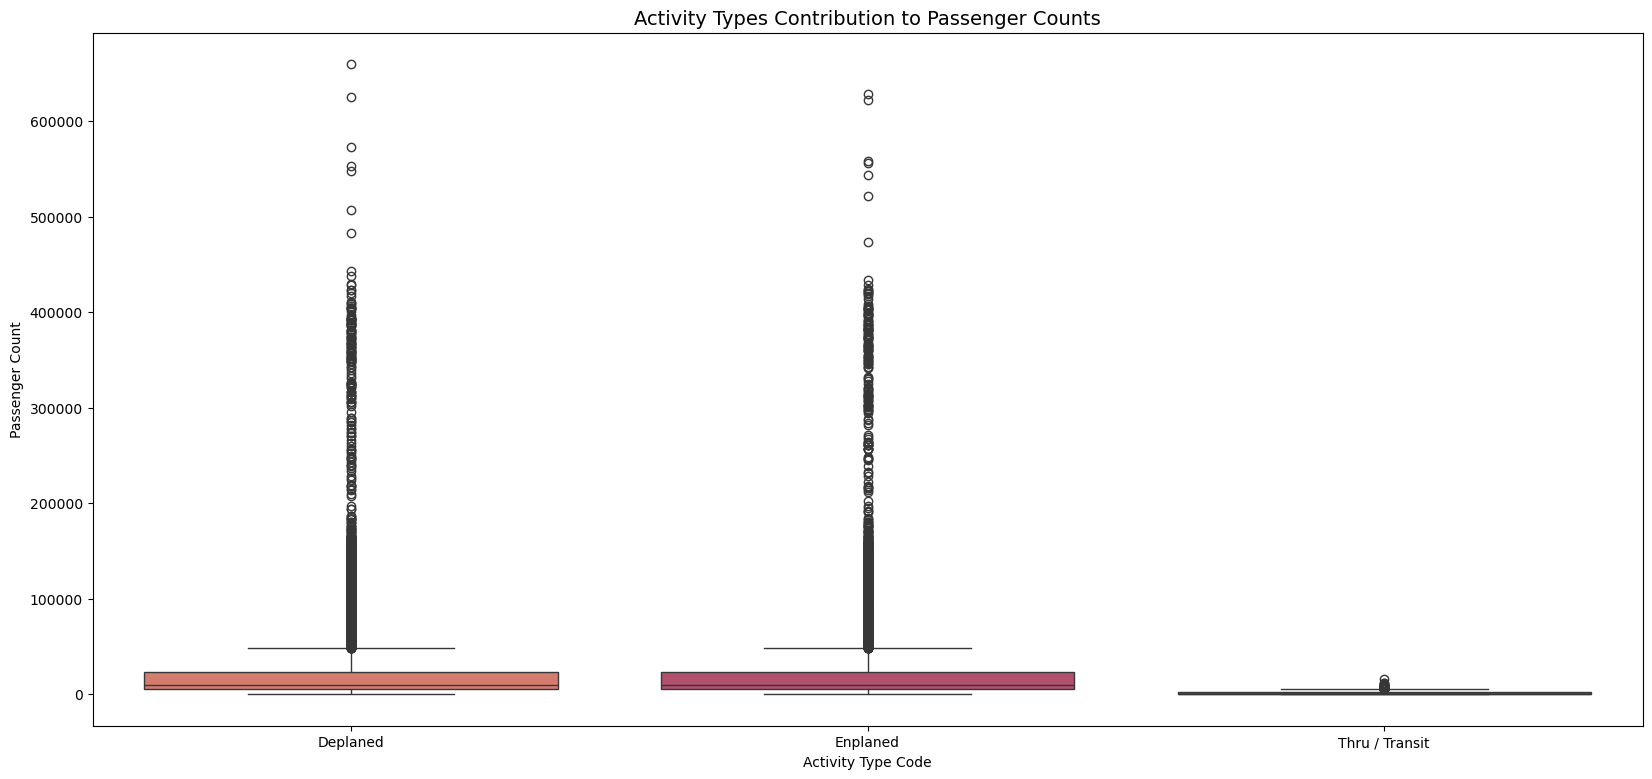

In [24]:
plt.figure(figsize=(20,9))
sb.boxplot(x=df['Activity Type Code'],y = df['Passenger Count'], palette= 'flare')
plt.title("Activity Types Contribution to Passenger Counts", fontsize=14)
plt.show()

# Insights : 
## Above Boxplot give us the information that the Passenger Count is comparetively equal in Deplaned and Enplaned .
## And Thru / Transit have negligible Passenger Count .

# 3. Temporal Analysis:
## How has passenger traffic evolved over the years and months?

In [27]:
dd = pd.pivot_table(data=df,index='Year',columns='Month',values='Passenger Count',aggfunc='sum')
dd

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2005,NaN,3195866.0,2671797.0,NaN,NaN,3225769.0,NaN,NaN,NaN,2617333.0,2770715.0,2740553.0
2006,2773293.0,3143839.0,2698200.0,2223024.0,2448889.0,3227605.0,3071396.0,2708778.0,2829000.0,2653887.0,2834959.0,2720100.0
2007,2869247.0,3436417.0,2903637.0,2304990.0,2507430.0,3382382.0,3263621.0,2820085.0,3056934.0,2922500.0,3129309.0,2957530.0
2008,3029021.0,3612297.0,2962937.0,2595676.0,2670053.0,3603946.0,3453751.0,3127387.0,3305954.0,2744485.0,3124451.0,3004720.0
2009,3024973.0,3650668.0,3074209.0,2359800.0,2644539.0,3649702.0,3419595.0,2925918.0,3177100.0,2971484.0,3249428.0,3191526.0
2010,3139059.0,3771842.0,3167124.0,2515361.0,2785466.0,3765824.0,3612886.0,3105958.0,3380355.0,3163659.0,3490100.0,3356365.0
2011,3200527.0,3917884.0,3441693.0,2610667.0,2883810.0,3935589.0,3766323.0,3129205.0,3547804.0,3326859.0,3602455.0,3564970.0
2012,3563007.0,4356216.0,3443039.0,2998119.0,3211600.0,4284443.0,4107195.0,3472440.0,3820570.0,3478890.0,3844987.0,3819379.0
2013,3604104.0,4347059.0,3814984.0,2966477.0,3204637.0,4176486.0,4146797.0,3593364.0,3933016.0,3466878.0,3910790.0,3781168.0


# Insights :
## In the above given table, the sum of passenger traffic is shown with specific year and month .
## In July, June, August of every year, the increase of Passenger Count is seen .
## Rest months have moderate amount of Passenger Count in every year .

## Are there specific months or seasons that show peak or low passenger traffic?

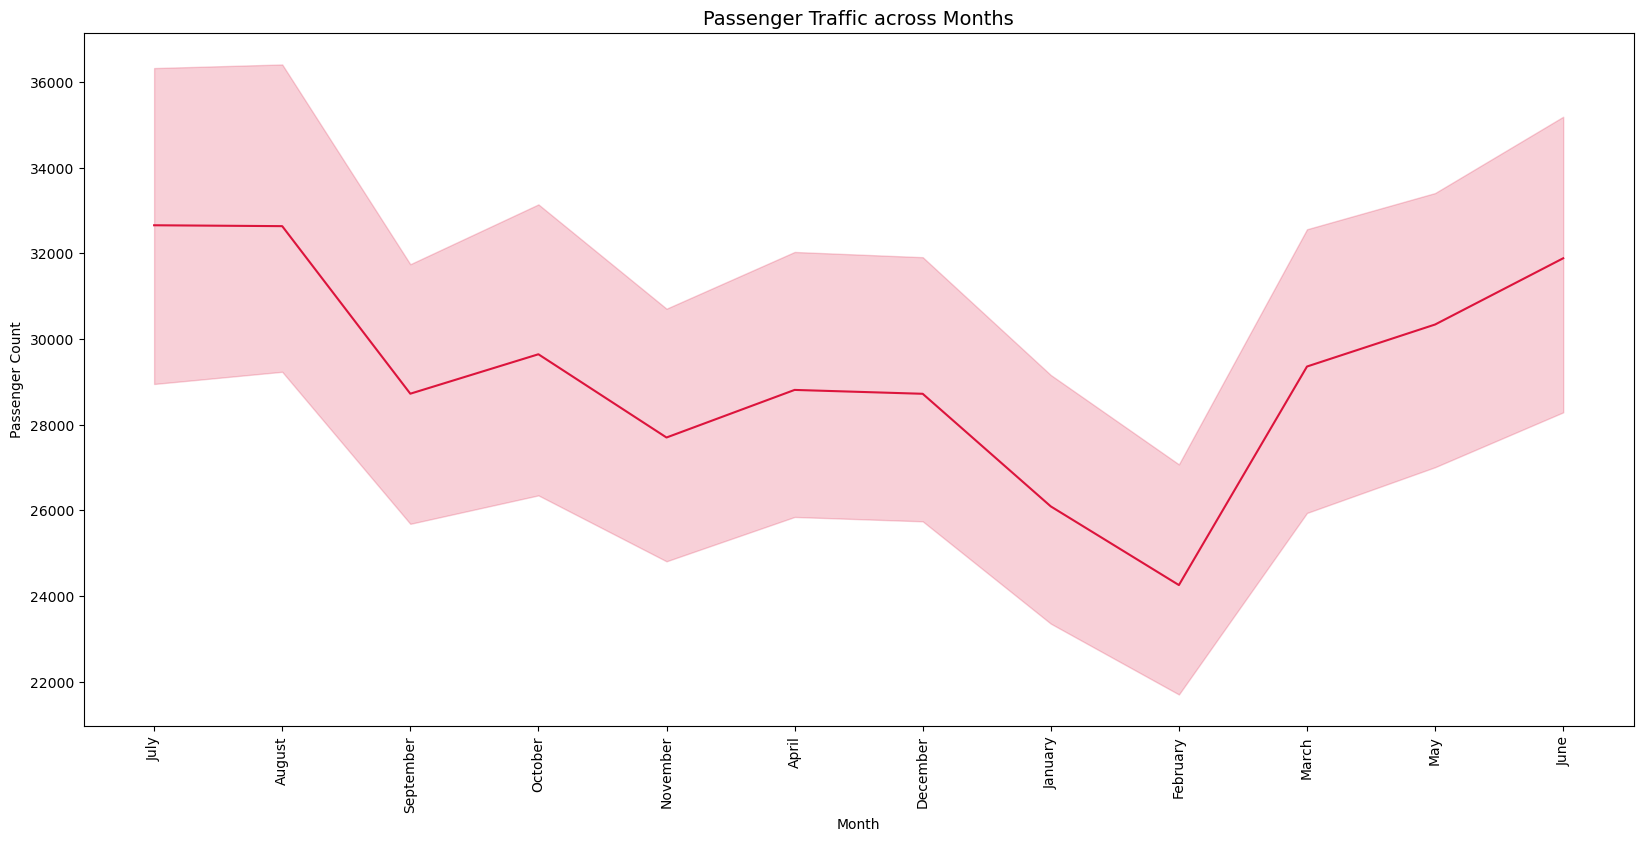

In [87]:
plt.figure(figsize=(20,9))
sb.lineplot(x=df.Month,y=df['Passenger Count'], color = 'crimson')
plt.title("Passenger Traffic across Months", fontsize=14)
plt.xticks(rotation = 90)
plt.show()

# Insights :
## In above graph, June, July and August are showing the peak of passenger traffic where traffic is highest .
## January and February are the months whichs shows the lowest passenger traffic of all months .
## Also rest of the months have shown moderate amount of passenger traffic .

## What trends can be identified from year-over-year passenger data?

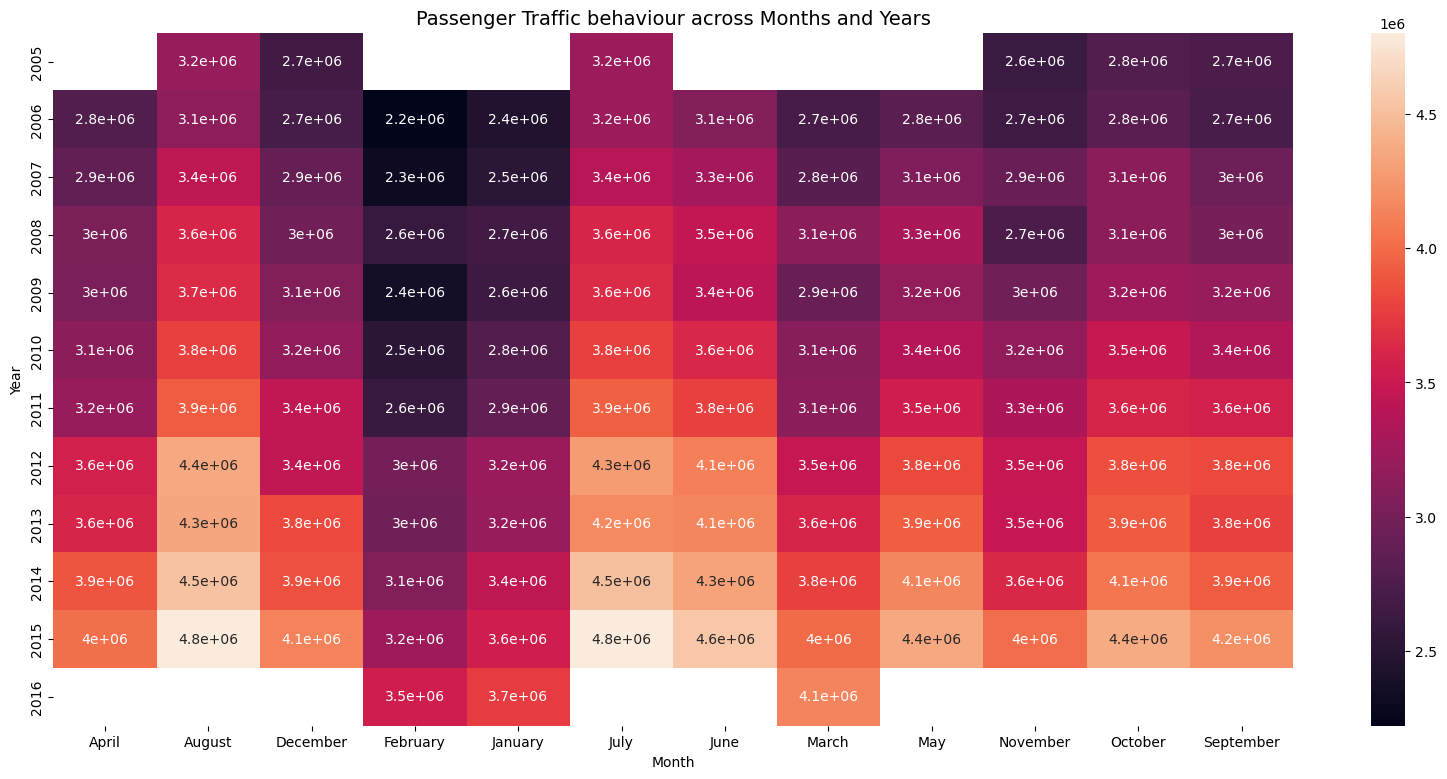

In [33]:
plt.figure(figsize=(20,9))
plt.title("Passenger Traffic behaviour across Months and Years", fontsize=14)
sb.heatmap(dd,annot=True)
plt.show()

# Insights :
## In the above given Heatmap, the sum of passenger traffic is shown with specific year and month .
## In July, June, August of every year, the increase of Passenger Count is seen .
## Rest months have moderate amount of Passenger Count in every year .

# 4. Airline Analysis:
## Which airlines handle the highest and lowest number of passengers?

In [36]:
df.groupby('Operating Airline')['Passenger Count'].sum().nlargest(5)

Operating Airline
United Airlines - Pre 07/01/2013    105363917
United Airlines                      64876996
SkyWest Airlines                     35711737
American Airlines                    34588714
Virgin America                       26934738
Name: Passenger Count, dtype: int64

In [37]:
df.groupby('Operating Airline')['Passenger Count'].sum().nsmallest(5)

Operating Airline
Evergreen International Airlines      4
Boeing Company                       18
Atlas Air, Inc                       68
Ameriflight                         110
Xtra Airways                        146
Name: Passenger Count, dtype: int64

# Insights :
## Above analysis shows the highest and lowest number of passengers handled by airlines .
## The Airlines which handle highest amount of passenger are United Airlines, United Airlines, SkyWest Airlines, American Airlines, Virgin America .
## The Airlines which handle lowest amount of passenger arEvergreen International Airlines, Boeing Company, Atlas Air.Inc, Ameriflight, Xtra Airways .

## How is passenger traffic distributed among different airlines?

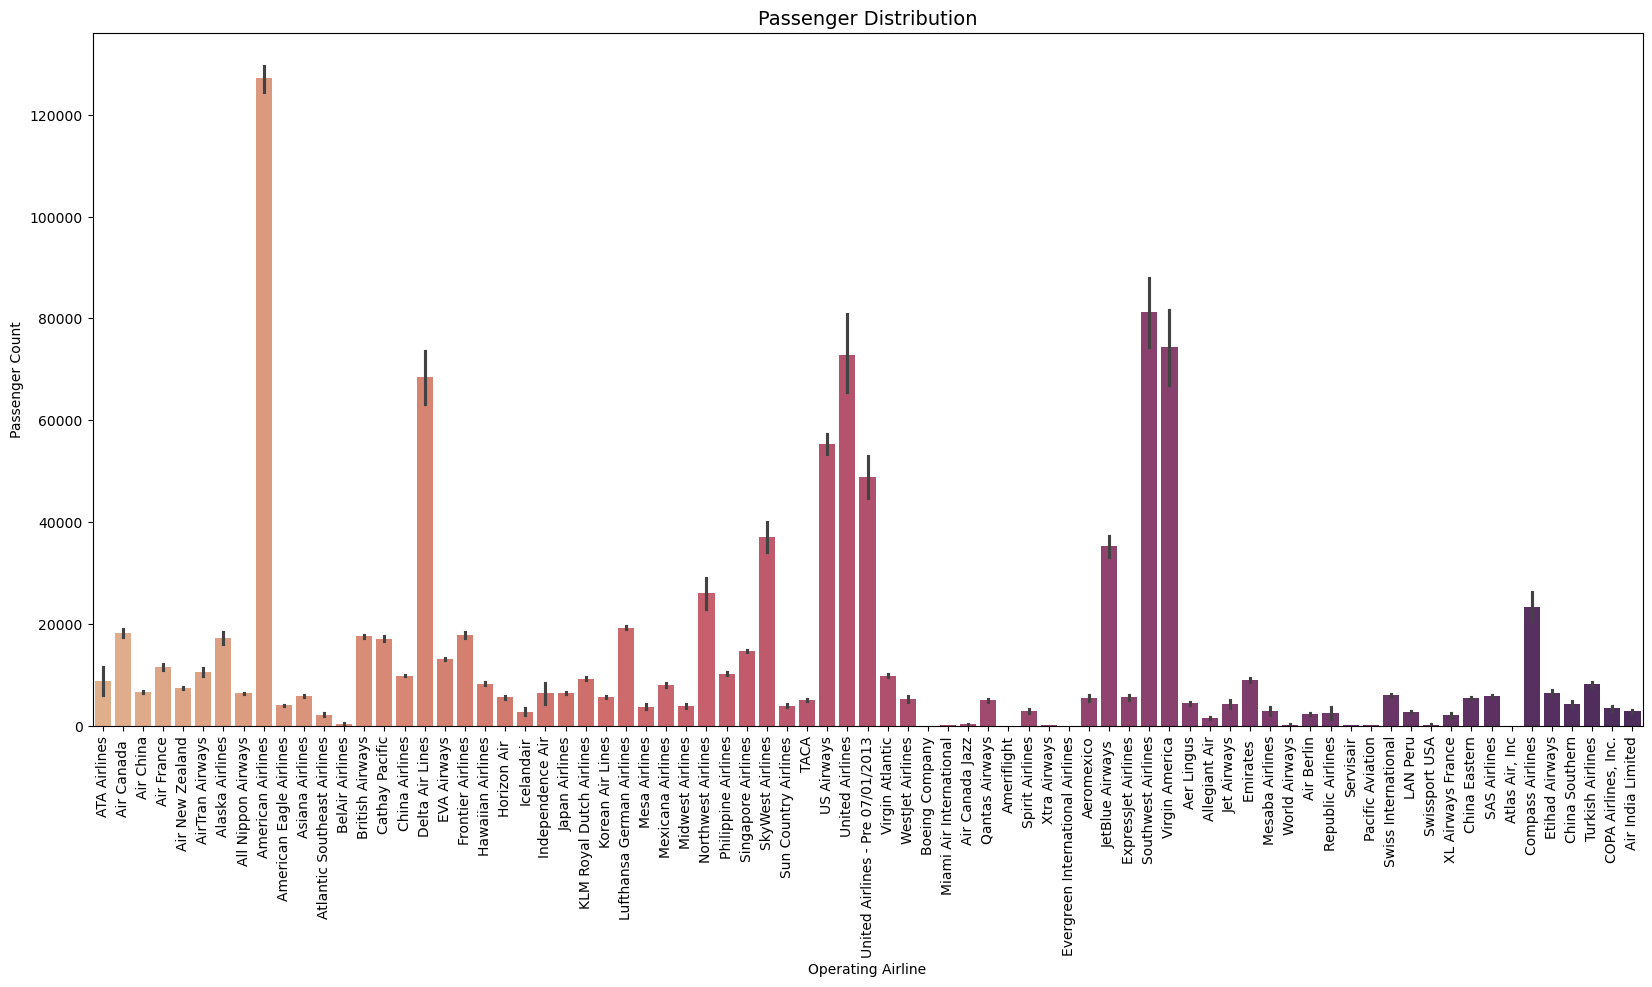

In [40]:
plt.figure(figsize=(20,9))
sb.barplot(x=df['Operating Airline'],y=df['Passenger Count'],palette='flare')
plt.title("Passenger Distribution", fontsize=14)
plt.xlabel('Operating Airline')
plt.ylabel('Passenger Count')
plt.xticks(rotation = 90)
plt.show()

# Insights :
## Above graph shows the distribution of Passenger Traffic between different Airlines .
## American Airlines handles the maximun amount of Passenger Traffic .
## Delta Air Lines, United Airlines, Southwest Airlines, Virgin America, etc,. handles moderate amount of Passenger Traffic .
## Rest Airlines handles less amount of Passenger Traffic .

# 5. Terminal and Boarding Area Analysis:
## Which terminals and boarding areas are the busiest in terms of passenger traffic?


In [43]:
df.groupby(["Terminal", "Boarding Area"])["Passenger Count"].sum().nlargest(5)

Terminal       Boarding Area
Terminal 3     F                138526673
Terminal 1     B                 67373108
International  A                 57670570
               G                 57613844
Terminal 1     C                 42271640
Name: Passenger Count, dtype: int64

# Insights :
## Above analysis helps us to identify busiest Terminals and Boarding Areas .
## As shown Terminal 3 and Boarding Area F is the busiest in terms of Passenger Traffic .
## And others are further sorted in descending order .


## Is there a notable difference in usage between terminals or boarding areas?

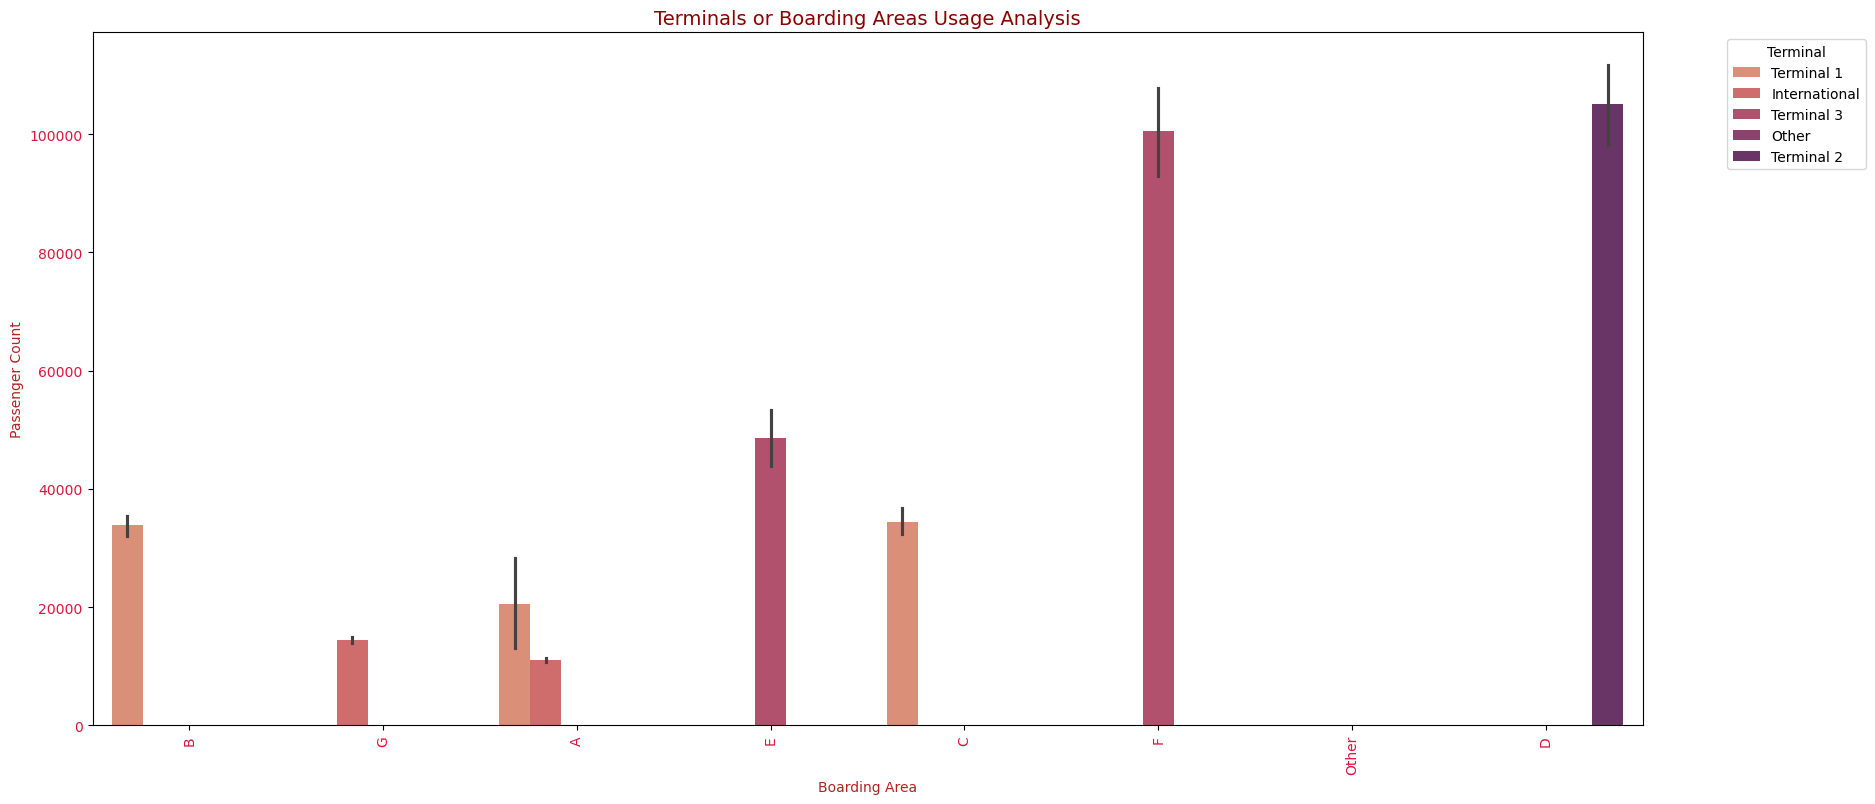

In [46]:
plt.figure(figsize=(20,9))
sb.barplot(x=df['Boarding Area'],y=df['Passenger Count'],hue=df['Terminal'], palette= 'flare')
plt.title("Terminals or Boarding Areas Usage Analysis", fontsize=14, color='darkred')
plt.xlabel('Boarding Area', color='firebrick')
plt.ylabel('Passenger Count', color='firebrick')
plt.xticks(color='crimson')
plt.yticks(color='crimson')
plt.xticks(rotation = 90)
plt.legend(title='Terminal',bbox_to_anchor=(1.05,1))
plt.show()

# Insights :
## Above Barplot helps us to identify busiest Terminals and Boarding Areas .¶
## As shown Terminal 2 and Boarding Area D is the busiest in terms of Passenger Traffic .
## Terminal 3 and Boarding Area F is the busier in terms of Passenger Traffic .
## Terminal International and Boarding Area G is the less busy in terms of Passenger Traffic .